In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# パッケージの読み込み

In [2]:
#パッケージの読み込みは「import」
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み

In [3]:
#データの読み込みはPandasの「read_csv()」
data_train = pd.read_csv('../input/titanic/train.csv')
data_test = pd.read_csv('../input/titanic/test.csv')
data_gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')

# EDA（探索的データ分析）

In [4]:
#変数名で実行すれば中身を表示してくれる
#ただし、数が多いと自動で省略される
data_train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [5]:
#出力行数の確認
pd.get_option('display.max_rows')
#全行数の出力
pd.set_option('display.max_rows', 900)

In [6]:
data_train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

In [7]:
#データ数が多いと全件表示は時間がかかる
#head()で表示行数を指定（デフォルト5行）
data_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
data_test.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

In [9]:
#describe()を使えば、主要な統計指標をまとめて確認できる
data_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [10]:
#データの概要をざっと確認するには「pandas_profiling」が便利
import pandas_profiling

/tmp/ipykernel_47/12442109.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [11]:
#実行はpandas.DataFrameの「profile_report()」
data_train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 43.58it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 各特徴量と目的変数の関係性を確認

<Axes: xlabel='Pclass', ylabel='count'>

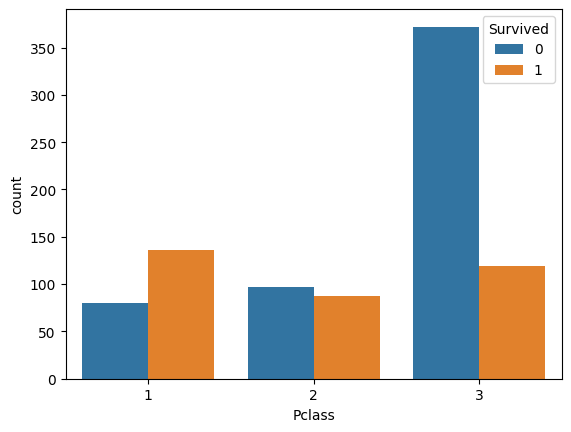

In [12]:
#PclassとSurvivedの件数を棒グラフで可視化
sns.countplot(x='Pclass', hue='Survived', data=data_train)

<Axes: xlabel='Sex', ylabel='count'>

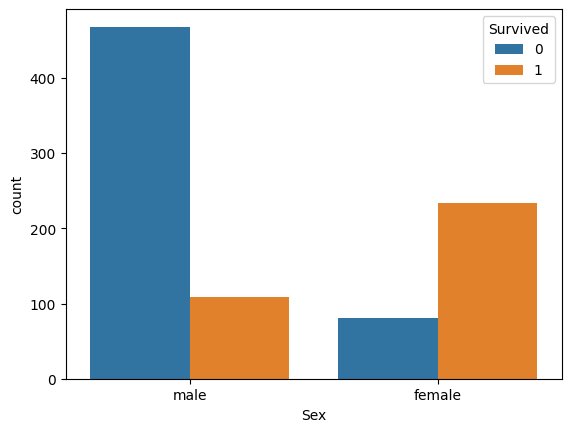

In [13]:
#SexとSurvivedの件数を棒グラフで可視化
sns.countplot(x='Sex', hue='Survived', data=data_train)

<Axes: xlabel='Age', ylabel='count'>

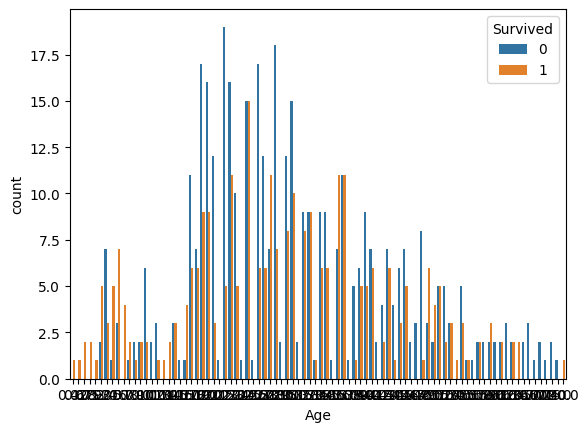

In [14]:
#AgeとSurvivedの件数を棒グラフで可視化
#データ数が多いと非常に見づらい
sns.countplot(x='Age', hue='Survived', data=data_train)

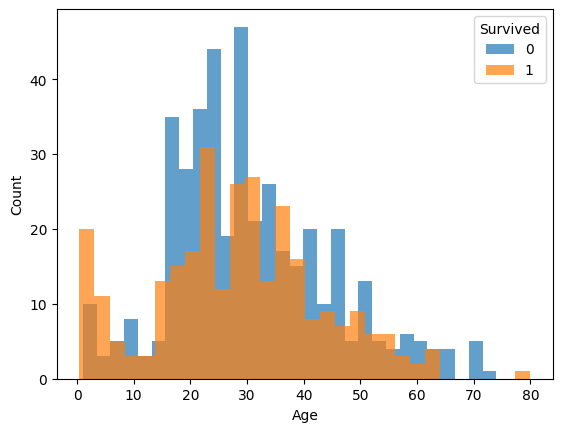

In [15]:
#ヒストグラムで幅を取って確認
plt.hist(data_train.loc[data_train['Survived'] == 0, 'Age'].dropna(), bins=30, alpha=0.7, label='0')
plt.hist(data_train.loc[data_train['Survived'] == 1, 'Age'].dropna(), bins=30, alpha=0.7, label='1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

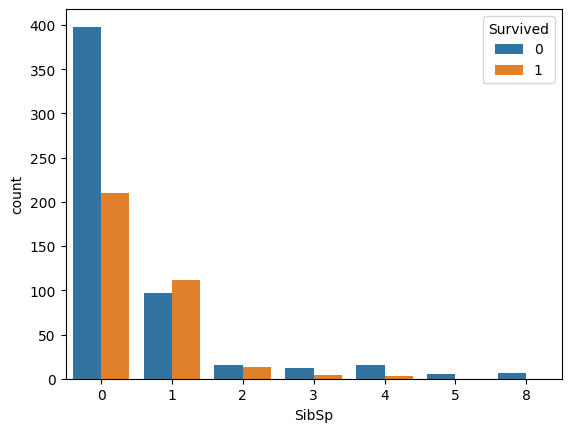

In [16]:
#SibSpとSurvivedの件数を棒グラフで可視化
sns.countplot(x='SibSp', hue='Survived', data=data_train)

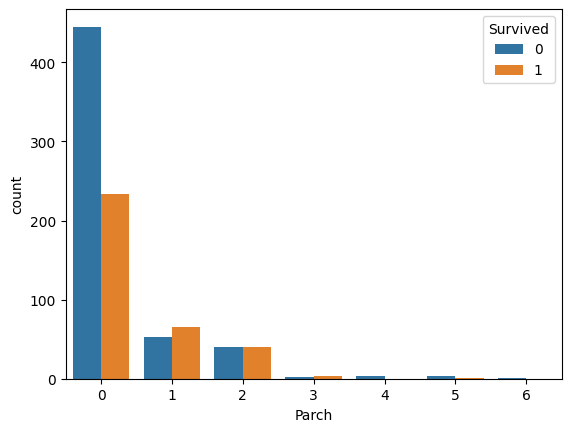

In [17]:
#ParchとSurvivedの件数を棒グラフで可視化
sns.countplot(x='Parch', hue='Survived', data=data_train)
#凡例の位置固定
plt.legend(loc='upper right', title='Survived')

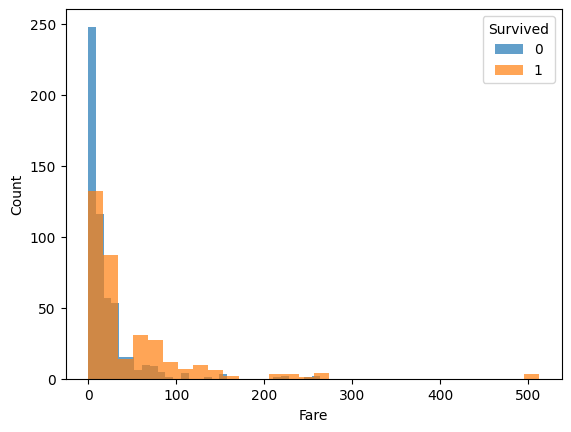

In [18]:
#ヒストグラムで幅を取って確認
#特定の範囲に集まっているときはビンの範囲を指定したほうが見やすい
plt.hist(data_train.loc[data_train['Survived'] == 0, 'Fare'].dropna(), bins=30, alpha=0.7, label='0')
plt.hist(data_train.loc[data_train['Survived'] == 1, 'Fare'].dropna(), bins=30, alpha=0.7, label='1')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived')

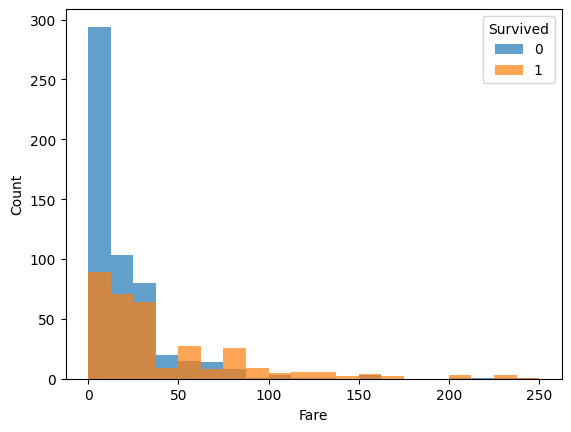

In [19]:
#再確認
#特定の範囲に集まっているときはビンの範囲を指定したほうが見やすい
plt.hist(data_train.loc[data_train['Survived'] == 0, 'Fare'].dropna(), range=(0,250), bins=20, alpha=0.7, label='0')
plt.hist(data_train.loc[data_train['Survived'] == 1, 'Fare'].dropna(), range=(0,250), bins=20, alpha=0.7, label='1')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

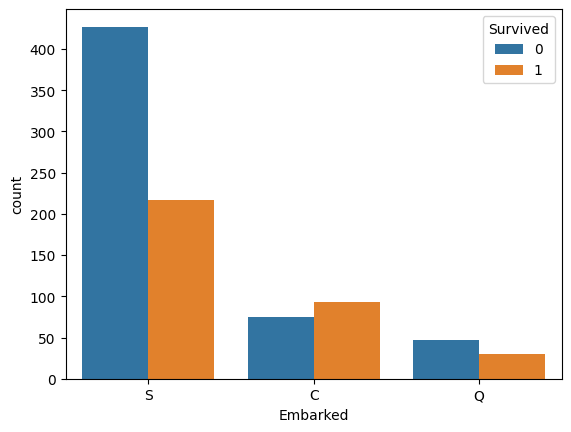

In [20]:
#EmbarkedとSurvivedの件数を棒グラフで可視化
sns.countplot(x='Embarked', hue='Survived', data=data_train)

# 特徴量エンジニアリング

In [21]:
#教師データとテストデータ、双方にエンジニアリングを行うため、一旦ひとつに結合
data_all = pd.concat([data_train, data_test], sort=False)

In [22]:
#各特徴量の欠損値の数を確認
#テストデータは「Survived」がないため欠損値としてカウントされている
data_all.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# 指針
**①Sexは女性が圧倒的に生存率が高いため、男性と女性別々の特徴量に分けてみる  
②ParchとSibSpはどちらも家族構成の特徴量であり、人数に応じて生存率が変わることから、2つを組み合わせた特徴量を作ってみる  
③Ageは年代差が大きいため、平均に標準偏差を加えてばらつきを考慮する**

In [23]:
#Sexの値を男性・女性で分ける
data_all['Sex_male'] = data_all['Sex'].replace(['male', 'female'], [1, 0])
data_all['Sex_female'] = data_all['Sex'].replace(['male', 'female'], [0, 1])
data_all['Sex'] = data_all['Sex'].replace(['male', 'female'], [0, 1])
data_all.head()

/tmp/ipykernel_47/1263348787.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_all['Sex_male'] = data_all['Sex'].replace(['male', 'female'], [1, 0])
/tmp/ipykernel_47/1263348787.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_all['Sex_female'] = data_all['Sex'].replace(['male', 'female'], [0, 1])
/tmp/ipykernel_47/1263348787.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To 

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  Sex_male  Sex_female  
0         A/5 21171   7.2500   NaN        S         1           0  
1          PC 17599  71.2833   C85        C         0           1  
2  STON/O2. 3101282   7.9250   NaN        S         0           1  
3            113803  53.1000  C123        S         0           1  
4            373450   8.0500   NaN        S         1           0

<Axes: xlabel='Families', ylabel='count'>

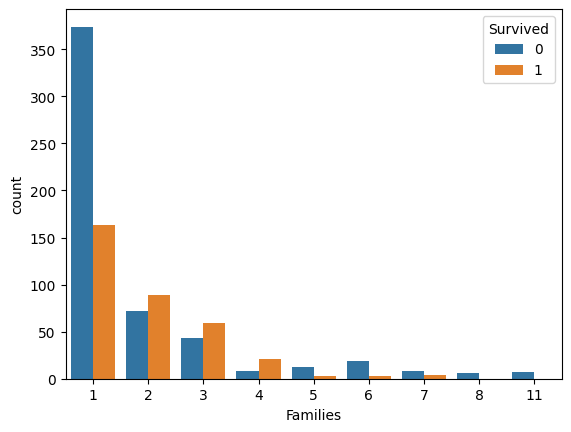

In [24]:
#ParchとSibSpを合わせた特徴量を作成
data_all['Families'] = data_all['Parch'] + data_all['SibSp'] + 1
data_train['Families'] = data_all['Families'][:len(data_train)]
data_test['Families'] = data_all['Families'][len(data_train):]
sns.countplot(x='Families', data=data_train, hue='Survived')

In [25]:
#1がずば抜けて多いため、別の特徴量として抜き出す
data_all['Alone'] = 0
data_all.loc[data_all['Families'] == 1, 'Alone'] = 1
data_all.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  Sex_male  Sex_female  Families  \
0         A/5 21171   7.2500   NaN        S         1           0         2   
1          PC 17599  71.2833   C85        C         0           1         2   
2  STON/O2. 3101282   7.9250   NaN        S         0           1         1   
3            113803  53.1000  C123        S         0           1         2   
4            373450   8.0500   NaN        S         1           0         1   

   Alone  
0      0  
1      0  
2      1  
3      0  
4      1

In [26]:
ave = data_all['Age'].mean()
std = data_all['Age'].std()
#「平均±標準偏差」間の値からランダムで選ばれた値で補完
data_all['Age'].fillna(np.random.randint(ave - std, ave + std), inplace=True)
data_all.head()
#乱数なので再現性がないという欠点がある
#年齢は若い人から高齢者まで幅広いため、中央値で補完するのも手
#data_all['Age'].fillna(data_all['Age'].median(), inplace=True)

/tmp/ipykernel_47/3504800888.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_all['Age'].fillna(np.random.randint(ave - std, ave + std), inplace=True)


PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  Sex_male  Sex_female  Families  \
0         A/5 21171   7.2500   NaN        S         1           0         2   
1          PC 17599  71.2833   C85        C         0           1         2   
2  STON/O2. 3101282   7.9250   NaN        S         0           1         1   
3            113803  53.1000  C123        S         0           1         2   
4            373450   8.0500   NaN        S         1           0         1   

   Alone  
0      0  
1      0  
2      1  
3      0  
4      1

In [27]:
#Embarkedの欠損値を補完し、数値に置き換える
data_all['Embarked'] = data_all['Embarked'].fillna('S')
data_all['Embarked'] = data_all['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

/tmp/ipykernel_47/1929905778.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_all['Embarked'].fillna('S', inplace=True)


In [28]:
data_all.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked  Sex_male  Sex_female  Families  \
0         A/5 21171   7.2500   NaN         0         1           0         2   
1          PC 17599  71.2833   C85         1         0           1         2   
2  STON/O2. 3101282   7.9250   NaN         0         0           1         1   
3            113803  53.1000  C123         0         0           1         2   
4            373450   8.0500   NaN         0         1           0         1   

   Alone  
0      0  
1      0  
2      1  
3      0  
4      1

In [29]:
categorical_features = ['Sex', 'Embarked','Pclass']

In [30]:
#影響の少なそうな特徴量は一旦削除する
drop_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data_all.drop(drop_columns, axis=1, inplace=True)

In [31]:
#再確認
data_all.isnull().sum()

Survived      418
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            1
Embarked        0
Sex_male        0
Sex_female      0
Families        0
Alone           0
dtype: int64

In [33]:
#Fareの欠損値を平均値で補完する
data_all['Fare'] = data_all['Fare'].fillna(np.mean(data_all['Fare']))

In [34]:
#結合したデータを、再度教師データとテストデータに分離
data_train = data_all[:len(data_train)]
data_test = data_all[len(data_train):]

モデル作成

In [35]:
y_data_train = data_train['Survived']
X_data_train = data_train.drop('Survived', axis=1)
X_data_test = data_test.drop('Survived', axis=1)

In [36]:
from sklearn.model_selection import train_test_split
X_data_train, X_data_valid, y_data_train, y_data_valid = train_test_split(
    X_data_train, y_data_train, 
    test_size=0.3, 
    random_state=0,
    stratify=y_data_train)

In [38]:
# # LightGBMライブラリを読み込み、'lgb'という省略名で使用できるようにする
# import lightgbm as lgb

# # 学習用データ(X_data_train, y_data_train)をLightGBM専用のDataset形式に変換
# # categorical_feature引数で、カテゴリ変数（数値ではなく分類を表す列）を指定する
# lgb_data_train = lgb.Dataset(X_data_train, y_data_train, categorical_feature=categorical_features)

# # 検証用データ(X_data_valid, y_data_valid)も同様にDataset形式に変換
# # reference=lgb_data_train とすることで、学習データと尺度が合うように調整される
# lgb_data_eval = lgb.Dataset(X_data_valid, y_data_valid, reference=lgb_data_train, categorical_feature=categorical_features)

# # モデルの学習パラメータを辞書形式で定義
# params = {
#     "objective": "binary",
#     "metric": "binary_logloss",
#     "verbosity": 1  # 1=ログ出す, 0=出さない
# }

# # 定義したパラメータとデータセットを使ってモデルの学習を実行
# model = lgb.train(
#     params,                        # 上記で設定したパラメータ
#     lgb_data_train,                # 学習用データセット
#     valid_sets=[lgb_data_eval],      # 学習経過の確認（検証）に使うデータセット
#     # verbose_eval=10,               # 10回学習が進むごとにログ（評価スコア）を表示する
#     num_boost_round=1000,          # 学習の反復回数（決定木の作成数）の最大値を1000回に設定
#     early_stopping_rounds=10       # アーリーストッピング：10回連続で性能が改善しなければ学習を早期終了する
# )

TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [40]:
# 上のセルの代案
import lightgbm as lgb

clf = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=1000,
)

clf.fit(
    X_data_train,
    y_data_train,
    eval_set=[(X_data_valid, y_data_valid)],
    eval_metric='binary_logloss',
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)


[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

LGBMClassifier(n_estimators=1000, objective='binary')

In [41]:
clf.best_iteration_

24

再予測

In [42]:
best_iter = clf.best_iteration_

# train + valid を結合して最終学習用データを作成
X_all = pd.concat([X_data_train, X_data_valid], axis=0)
y_all = pd.concat([y_data_train, y_data_valid], axis=0)

# 最終モデル
clf_final = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=best_iter
)

clf_final.fit(X_all, y_all)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(n_estimators=24, objective='binary')

In [43]:
# 予測（確率）
y_pred_proba = clf_final.predict(X_data_test)

# 0/1 に変換
y_pred = (y_pred_proba >= 0.5).astype(int)

In [46]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
submit = data_gender_submission
submit['Survived'] = y_pred.astype(int)
submit.to_csv("lgbm_submission.csv", index=False)